In [663]:
from torch import nn

class PINNhigh(nn.Module):
    def __init__(self):
        super(PINNhigh,self).__init__()
        weights = tensor([60.,0.6,0.5,0.5])
        self.weights = nn.Parameter(weights)
        self.selu = nn.ELU()
        self.tanh = nn.Tanh()
        self.sig = nn.Sigmoid()
    def forward(self,x):
        a,b,c,d = self.weights
        b = abs(b)
        x2 = (a * (x ** b))
        return x2
    
class PINNlow(nn.Module):
    def __init__(self):
        super(PINNlow,self).__init__()
        weights = tensor([60.,0.5])
        self.selu = nn.ELU()
        self.weights = nn.Parameter(weights)
    def forward(self,x):
        c,d = self.weights
        x1 = c*x**d
        return x1

In [370]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.input = nn.Linear(1,4)
        self.act1 = nn.Tanh()
        # self.layer2 = nn.Linear(8,16)
        self.act2 = nn.LeakyReLU(negative_slope=0.3)
        self.layer1 = nn.Linear(4,8)
        self.act3 = nn.Tanh()
        self.hidden = nn.Linear(8,16)
        self.batchnorm = nn.BatchNorm1d(16)
        self.drop = nn.Dropout(p=0.05)
        self.layer2 = nn.Linear(16,1)
        
    def forward(self, x):
        x = self.act1(self.input(x))
        x = self.act3(self.hidden(self.act2(self.layer1(x))))
        x = self.batchnorm(x)
        x = self.drop(x)
        x = self.layer2(x)
        return x

In [664]:
modellow = PINNlow()
model = PINNhigh()

In [616]:
model(tensor(0.391))

tensor(34.1552, grad_fn=<MulBackward0>)

In [6]:
import os
os.chdir('..')

In [672]:
list(modellow.parameters())

[Parameter containing:
 tensor([56.5677,  0.2263], requires_grad=True)]

In [585]:
model.eval()

PINN(
  (selu): ELU(alpha=1.0)
  (tanh): Tanh()
  (sig): Sigmoid()
)

In [5]:
os.listdir('.')

['testing.ipynb',
 'observtional_pass.ipynb',
 '.ipynb_checkpoints',
 'test.ipynb']

In [638]:
from torch import tensor
import torch
import numpy as np
from utils.dataset_loader import get_dataset
df = get_dataset(name='test.pkl')
X = df.iloc[:,1][df.iloc[:,1]>0].apply(lambda x: x * 1.350+0.07 )
X = tensor((X[X<1].values[1:240]).reshape(-1,1)).float()
Y = (df.iloc[:,3][df.iloc[:,3]>0].values[1:240])*85+15

Y = tensor((Y[Y<65])).float()
print(X.shape,Y.shape)
train_data = torch.utils.data.TensorDataset(X[:Y.size(0)], Y)
Xtrain = torch.utils.data.DataLoader(train_data,batch_size=1)

['dataset.pkl', 'test.pkl', 'dataset.csv']
torch.Size([239, 1]) torch.Size([198])


In [639]:
X.shape, Y.shape

(torch.Size([239, 1]), torch.Size([198]))

In [599]:
count3

901

In [665]:

from torch.functional import F
import torch
optim = torch.optim.Adam(params=model.parameters(),lr=0.1)
optim1 = torch.optim.Adam(params=modellow.parameters(),lr=0.1)
losses=[]
ape = 0
def train():
    for i,data in enumerate(Xtrain):
        # print(data)
        if data[0]>=0.3:
            loss = F.mse_loss(model(data[0]), data[1]).sqrt()
            ape = abs((model(data[0]) - data[1])/data[1])
            loss.backward()
            optim.step()
            optim.zero_grad()
            losses.append(loss.item())
        else:
            loss1 = F.mse_loss(modellow(data[0]), data[1]).sqrt()
            loss1.backward()
            optim1.step()
            optim1.zero_grad()
            losses.append(loss1.item())
            
for i in range(100):
    train()


/var/folders/qv/zzgcbq096_v04lckg4gc06280000gn/T/ipykernel_78897/739023566.py:18: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss1 = F.mse_loss(modellow(data[0]), data[1]).sqrt()
/var/folders/qv/zzgcbq096_v04lckg4gc06280000gn/T/ipykernel_78897/739023566.py:11: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(model(data[0]), data[1]).sqrt()


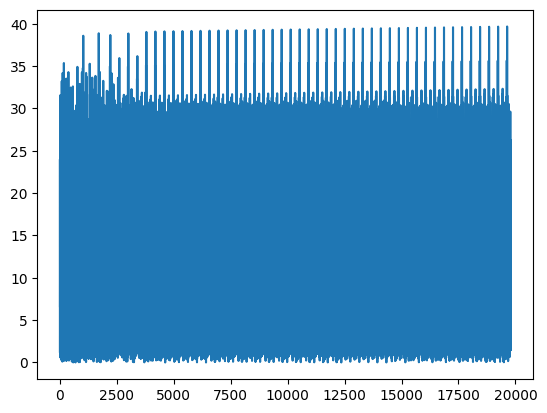

In [666]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [288]:
ape

0

In [621]:
model(data[0]) - data[1]

tensor([-26.8759], grad_fn=<SubBackward0>)

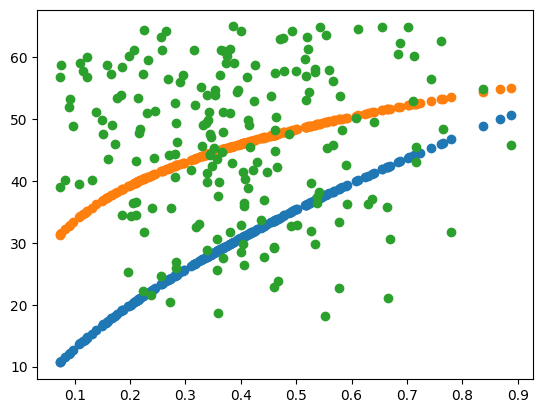

In [671]:
plt.scatter(X.numpy(),model(X).detach().numpy())
plt.scatter(X.numpy(),modellow(X).detach().numpy())
# plt.scatter(X.numpy(),65*(X.numpy()))
plt.scatter(X[:Y.size(0)].numpy(),Y.numpy())

In [668]:
np.mean([model(X).detach().numpy(),X.numpy(),modellow(X).detach().numpy()])

25.035963

In [468]:
nppred = np.poly1d(np.polyfit(X[:Y.size(0)].numpy().ravel(),Y.numpy(),3))

In [486]:
model(tensor([[0.304]]))

tensor([[38.6508]], grad_fn=<MulBackward0>)

In [475]:
nppred(0.052)

51.552904849127444

In [541]:
(np.array([0.91,0.92])<0.3).any()

False

In [1]:
import os
os.chdir('..')

In [2]:
from nets.HET_dense import dense
net = dense()

NOTE: Redirects are currently not supported in Windows or MacOs.


['dataset.pkl', 'test.pkl', 'dataset.csv']


In [3]:
net.compile()

Shapes for debug: (X,Y) torch.Size([800, 2]) torch.Size([800, 2])


/opt/homebrew/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2, 2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


APE = 0.1999948
APE = 0.40540397
APE = 0.51473147
APE = 0.035054494
APE = 0.109371826
APE = 0.28630367
APE = 0.28174418
APE = 0.37664235
APE = 0.3389977
APE = 0.03088352
APE = 0.037932683
APE = 2.0847788
APE = 0.42862993
APE = 0.25106722
APE = 0.26935473
APE = 0.07515247
APE = 0.6884608
APE = 0.16629094
APE = 0.86696917
APE = 0.09519448
APE = 0.65048957
APE = 0.082191154
APE = 0.3193515
APE = 0.029065285
APE = 0.024254426
APE = 0.06586327
APE = 0.21122271
APE = 0.22262783
APE = 0.5395037
APE = 0.71576804
APE = 0.04110395
APE = 0.041129712
APE = 0.19359669
APE = 0.011259194
APE = 0.7309663
APE = 0.12956986
APE = 0.20278668
APE = 0.31738737
APE = 0.50724435
APE = 0.06684917
APE = 0.48211437
APE = 0.0910439
APE = 0.037071377
APE = 0.21652007
APE = 0.39809108
APE = 0.061668117
APE = 0.044628695
APE = 0.22555934
APE = 0.003082268
APE = 0.03354393
APE = 0.33133525
APE = 0.40099886
APE = 0.12279335
APE = 0.2518385
APE = 0.11321979
APE = 0.023403928
APE = 0.1202107
APE = 0.33177453
APE = 0.178

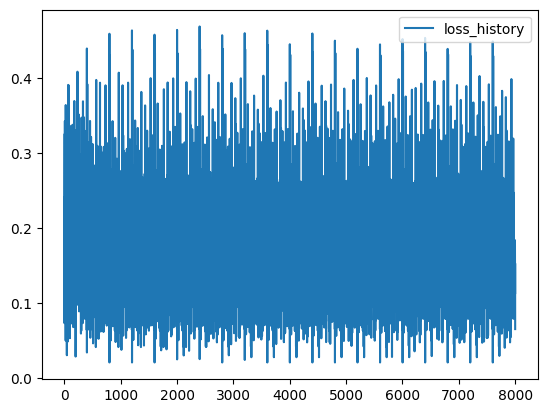

In [4]:
net.train(epochs=20)

In [5]:
net.plot3d()

In [3]:
net1 = dense()

['dataset.pkl', 'test.pkl', 'dataset.csv']


In [4]:
net1.compile(idx=(1,3,-2))

Shapes for debug: (X,Y) torch.Size([800, 2]) torch.Size([800])


APE = 0.16819364
APE = 0.16747798
APE = 0.17357957
APE = 0.02676026
APE = 0.017389063
APE = 0.037437443
APE = 0.08867876
APE = 0.2605514
APE = 0.45009392
APE = 0.3132035
APE = 0.16716269
APE = 1.487722
APE = 1.331979
APE = 0.14357461
APE = 0.15341483
APE = 4.542378
APE = 2.715478
APE = 0.32654446
APE = 0.89918023
APE = 0.5149092
APE = 0.9216075
APE = 0.24722993
APE = 0.7592257
APE = 0.27114037
APE = 0.19857004
APE = 0.43652612
APE = 0.35033253
APE = 0.22929826
APE = 0.9535545
APE = 0.27495515
APE = 0.24126083
APE = 0.3084456
APE = 0.18279523
APE = 0.30265194
APE = 8.712449
APE = 0.4320029
APE = 0.45049843
APE = 0.08551176
APE = 0.53111625
APE = 0.42754698
APE = 0.44750035
APE = 0.39624768
APE = 0.7664336
APE = 0.002045028
APE = 0.107848145
APE = 0.3042611
APE = 0.87911683
APE = 0.31272787
APE = 0.22869807
APE = 0.21051133
APE = 0.6572451
APE = 0.06745753
APE = 0.16665356
APE = 0.18418753
APE = 0.09228743
APE = 0.03740029
APE = 0.19154666
APE = 0.49699128
APE = 0.33304387
APE = 0.297794

/opt/homebrew/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


APE = 0.2668808
APE = 6.0983477
APE = 0.40128112
APE = 0.17333376
APE = 0.20784612
APE = 0.10690215
APE = 0.8501451
APE = 0.053145558
APE = 1.2909477
APE = 1.2467496
APE = 0.36494148
APE = 0.40710357
APE = 0.78059375
APE = 0.071572505
APE = 0.15699159
APE = 0.07667166
APE = 0.058713954
APE = 0.62611145
APE = 0.38671798
APE = 0.30901384
APE = 0.12459322
APE = 0.14128955
APE = 0.12724774
APE = 0.14538494
APE = 0.21666288
APE = 0.1344965
APE = 0.052324735
APE = 0.16711189
APE = 0.631955
APE = 19.21884
APE = 0.11654325
APE = 0.08260066
APE = 0.18644908
APE = 0.64251536
APE = 2.7466831
APE = 0.1369018
APE = 0.8556203
APE = 0.32876012
APE = 0.8812585
APE = 0.2909506
APE = 0.0250632
APE = 0.008218072
APE = 0.13655928
APE = 0.14129618
APE = 0.11572698
APE = 0.30316287
APE = 0.024564043
APE = 0.03529249
APE = 0.17271054
APE = 0.73262113
APE = 0.3479563
APE = 0.034414914
APE = 0.3761802
APE = 0.3100236
APE = 0.17920685
APE = 0.42218515
APE = 0.10732251
APE = 0.5603751
APE = 0.056413222
APE = 0.2

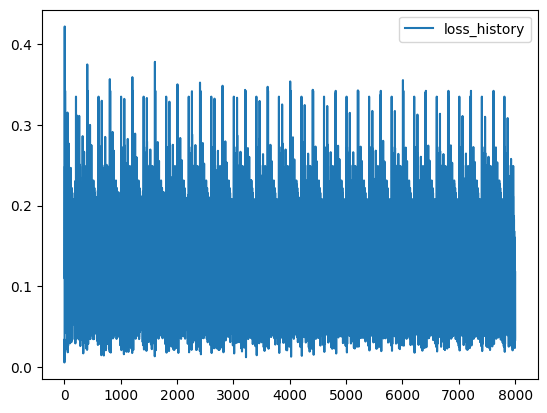

In [5]:
net1.train(epochs=20)

In [6]:
net1.plot3d()

ValueError: Invalid property specified for object of type plotly.graph_objs.Mesh3d: 'labels'

Did you mean "name"?

    Valid properties:
        alphahull
            Determines how the mesh surface triangles are derived
            from the set of vertices (points) represented by the
            `x`, `y` and `z` arrays, if the `i`, `j`, `k` arrays
            are not supplied. For general use of `mesh3d` it is
            preferred that `i`, `j`, `k` are supplied. If "-1",
            Delaunay triangulation is used, which is mainly
            suitable if the mesh is a single, more or less layer
            surface that is perpendicular to `delaunayaxis`. In
            case the `delaunayaxis` intersects the mesh surface at
            more than one point it will result triangles that are
            very long in the dimension of `delaunayaxis`. If ">0",
            the alpha-shape algorithm is used. In this case, the
            positive `alphahull` value signals the use of the
            alpha-shape algorithm, _and_ its value acts as the
            parameter for the mesh fitting. If 0,  the convex-hull
            algorithm is used. It is suitable for convex bodies or
            if the intention is to enclose the `x`, `y` and `z`
            point set into a convex hull.
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `colorscale`. In case `colorscale` is unspecified or
            `autocolorscale` is true, the default palette will be
            chosen according to whether numbers in the `color`
            array are all positive, all negative or mixed.
        cauto
            Determines whether or not the color domain is computed
            with respect to the input data (here `intensity`) or
            the bounds set in `cmin` and `cmax` Defaults to `false`
            when `cmin` and `cmax` are set by the user.
        cmax
            Sets the upper bound of the color domain. Value should
            have the same units as `intensity` and if set, `cmin`
            must be set as well.
        cmid
            Sets the mid-point of the color domain by scaling
            `cmin` and/or `cmax` to be equidistant to this point.
            Value should have the same units as `intensity`. Has no
            effect when `cauto` is `false`.
        cmin
            Sets the lower bound of the color domain. Value should
            have the same units as `intensity` and if set, `cmax`
            must be set as well.
        color
            Sets the color of the whole mesh
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.mesh3d.ColorBar` instance
            or dict with compatible properties
        colorscale
            Sets the colorscale. The colorscale must be an array
            containing arrays mapping a normalized value to an rgb,
            rgba, hex, hsl, hsv, or named color string. At minimum,
            a mapping for the lowest (0) and highest (1) values are
            required. For example, `[[0, 'rgb(0,0,255)'], [1,
            'rgb(255,0,0)']]`. To control the bounds of the
            colorscale in color space, use `cmin` and `cmax`.
            Alternatively, `colorscale` may be a palette name
            string of the following list: Blackbody,Bluered,Blues,C
            ividis,Earth,Electric,Greens,Greys,Hot,Jet,Picnic,Portl
            and,Rainbow,RdBu,Reds,Viridis,YlGnBu,YlOrRd.
        contour
            :class:`plotly.graph_objects.mesh3d.Contour` instance
            or dict with compatible properties
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        delaunayaxis
            Sets the Delaunay axis, which is the axis that is
            perpendicular to the surface of the Delaunay
            triangulation. It has an effect if `i`, `j`, `k` are
            not provided and `alphahull` is set to indicate
            Delaunay triangulation.
        facecolor
            Sets the color of each face Overrides "color" and
            "vertexcolor".
        facecolorsrc
            Sets the source reference on Chart Studio Cloud for
            `facecolor`.
        flatshading
            Determines whether or not normal smoothing is applied
            to the meshes, creating meshes with an angular, low-
            poly look via flat reflections.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.mesh3d.Hoverlabel`
            instance or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        i
            A vector of vertex indices, i.e. integer values between
            0 and the length of the vertex vectors, representing
            the "first" vertex of a triangle. For example, `{i[m],
            j[m], k[m]}` together represent face m (triangle m) in
            the mesh, where `i[m] = n` points to the triplet
            `{x[n], y[n], z[n]}` in the vertex arrays. Therefore,
            each element in `i` represents a point in space, which
            is the first vertex of a triangle.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        intensity
            Sets the intensity values for vertices or cells as
            defined by `intensitymode`. It can be used for plotting
            fields on meshes.
        intensitymode
            Determines the source of `intensity` values.
        intensitysrc
            Sets the source reference on Chart Studio Cloud for
            `intensity`.
        isrc
            Sets the source reference on Chart Studio Cloud for
            `i`.
        j
            A vector of vertex indices, i.e. integer values between
            0 and the length of the vertex vectors, representing
            the "second" vertex of a triangle. For example, `{i[m],
            j[m], k[m]}`  together represent face m (triangle m) in
            the mesh, where `j[m] = n` points to the triplet
            `{x[n], y[n], z[n]}` in the vertex arrays. Therefore,
            each element in `j` represents a point in space, which
            is the second vertex of a triangle.
        jsrc
            Sets the source reference on Chart Studio Cloud for
            `j`.
        k
            A vector of vertex indices, i.e. integer values between
            0 and the length of the vertex vectors, representing
            the "third" vertex of a triangle. For example, `{i[m],
            j[m], k[m]}` together represent face m (triangle m) in
            the mesh, where `k[m] = n` points to the triplet
            `{x[n], y[n], z[n]}` in the vertex arrays. Therefore,
            each element in `k` represents a point in space, which
            is the third vertex of a triangle.
        ksrc
            Sets the source reference on Chart Studio Cloud for
            `k`.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.mesh3d.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        lighting
            :class:`plotly.graph_objects.mesh3d.Lighting` instance
            or dict with compatible properties
        lightposition
            :class:`plotly.graph_objects.mesh3d.Lightposition`
            instance or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the surface. Please note that in
            the case of using high `opacity` values for example a
            value greater than or equal to 0.5 on two surfaces (and
            0.25 with four surfaces), an overlay of multiple
            transparent surfaces may not perfectly be sorted in
            depth by the webgl API. This behavior may be improved
            in the near future and is subject to change.
        reversescale
            Reverses the color mapping if true. If true, `cmin`
            will correspond to the last color in the array and
            `cmax` will correspond to the first color.
        scene
            Sets a reference between this trace's 3D coordinate
            system and a 3D scene. If "scene" (the default value),
            the (x,y,z) coordinates refer to `layout.scene`. If
            "scene2", the (x,y,z) coordinates refer to
            `layout.scene2`, and so on.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace.
        stream
            :class:`plotly.graph_objects.mesh3d.Stream` instance or
            dict with compatible properties
        text
            Sets the text elements associated with the vertices. If
            trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        vertexcolor
            Sets the color of each vertex Overrides "color". While
            Red, green and blue colors are in the range of 0 and
            255; in the case of having vertex color data in RGBA
            format, the alpha color should be normalized to be
            between 0 and 1.
        vertexcolorsrc
            Sets the source reference on Chart Studio Cloud for
            `vertexcolor`.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the X coordinates of the vertices. The nth element
            of vectors `x`, `y` and `z` jointly represent the X, Y
            and Z coordinates of the nth vertex.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the Y coordinates of the vertices. The nth element
            of vectors `x`, `y` and `z` jointly represent the X, Y
            and Z coordinates of the nth vertex.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        z
            Sets the Z coordinates of the vertices. The nth element
            of vectors `x`, `y` and `z` jointly represent the X, Y
            and Z coordinates of the nth vertex.
        zcalendar
            Sets the calendar system to use with `z` date data.
        zhoverformat
            Sets the hover text formatting rulefor `z`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `zaxis.hoverformat`.
        zsrc
            Sets the source reference on Chart Studio Cloud for
            `z`.
        
Did you mean "name"?

Bad property path:
labels
^^^^^^

torch.Size([800]) (800, 1) torch.Size([800, 2])
Size mismatch, try 3d plot, plotting by second dim of largest tensor


IndexError: too many indices for tensor of dimension 1

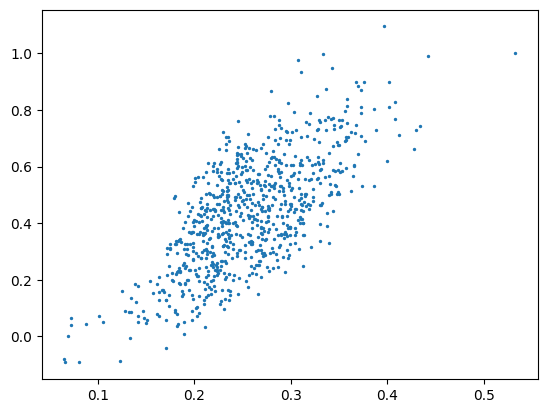

In [16]:
net1.plot()